### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read File

In [2]:
df = pd.read_csv('student_info.csv')

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


## Data Visualization

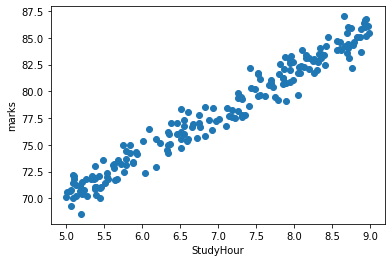

In [6]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel("StudyHour")
plt.ylabel("marks")
plt.show()

## data preprocessing

In [7]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
df['study_hours'] = df['study_hours'].fillna(df['study_hours'].mode()[0])

In [10]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [11]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,5.39,78.68
3,5.67,71.82
4,8.67,84.19


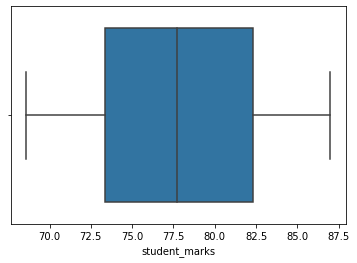

In [12]:
## outlier
import seaborn as sns
sns.boxplot(df['student_marks'])

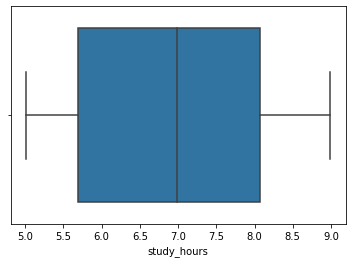

In [13]:
sns.boxplot(df['study_hours'])

### Separate Target And Dependent Variable And Split

In [14]:
x = df.drop("student_marks",axis = "columns")
y = df.drop("study_hours",axis = "columns")

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
print("Xtrain",X_train.shape)
print("ytrain",y_train.shape)
print("Xtest",X_test.shape)
print("ytest",y_test.shape)


Xtrain (160, 1)
ytrain (160, 1)
Xtest (40, 1)
ytest (40, 1)


## Model Building

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
ypred = lr.predict(X_test).round(2)

In [19]:
calculation = pd.DataFrame(np.c_[X_test,y_test,ypred], columns = ["Hours","Original Mark","predict mark"])
calculation.head()

,Hours,Original Mark,predict mark
0,6.09,76.48,74.70
1,6.55,76.03,76.42
2,8.13,82.27,82.37
3,7.53,81.57,80.11
4,6.38,77.01,75.79


In [20]:
lr.score(X_test,y_test)

0.9439507216329

In [21]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# rms = sqrt(mean_squared_error(y_test,ypred))
# rms

### Enter Hours and it calculate mark

In [22]:
#enter Hours of study
a = float(input("enter hours"))
result = lr.predict([[a]])[0][0].round(2)
print(f"if you study {a} hours your mark is",result)

enter hours5
if you study 5.0 hours your mark is 70.6
